## Checking that the H-matrices work!

In the future, we should probably move this to a test in `hmatrix.py`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import copy
import pickle
import numpy as np
import matplotlib.pyplot as plt
from celeri.hmatrix import build_hmatrix_from_mesh_tdes

with open('dev_data.pkl', 'rb') as f:
   estimation, operators, meshes, segment, station, command = pickle.load(f)

In [9]:
H = build_hmatrix_from_mesh_tdes(
    meshes[0],
    station,
    operators.meshes[0],
    1e-6,
    min_separation=1.25,
    min_pts_per_box=20,
)


(1841, 3) (1841,)


In [10]:
H.report_compression_ratio()

0.3058512026382072

In [11]:
M = operators.meshes[0].tde_to_velocities
M = np.delete(M, np.arange(2, M.shape[0], 3), axis=0)
M = np.delete(M, np.arange(2, M.shape[1], 3), axis=1)

x = np.random.rand(M.shape[1])
y_true = M.dot(x)
y_h = H.dot(x)

/var/folders/mt/cmys2v_143q1kpcrdt5wcdyr0000gn/T/ipykernel_70505/3659102695.py:1: RuntimeWarning: divide by zero encountered in log10
  log10err = np.log10(np.abs(y_true - y_h))


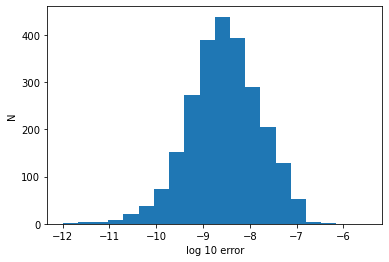

In [12]:
log10err = np.log10(np.abs(y_true - y_h))
plt.hist(log10err, bins=np.linspace(-12,-5.5,21))
plt.ylabel('N')
plt.xlabel('log 10 error')
plt.show()